<a href="https://colab.research.google.com/github/rabiacevikk/Deep-Learning-/blob/main/ANN_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Gerekli Kütüphanelerin Import İşlemleri
# pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings. filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [2]:
#mnist veri setinin yüklenmesi
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("Eğitim Seti Boyutu:",x_train.shape, y_train.shape)

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [4]:
print("Test Seti Boyutu:",x_test.shape, y_test.shape)

Test Seti Boyutu: (10000, 28, 28) (10000,)


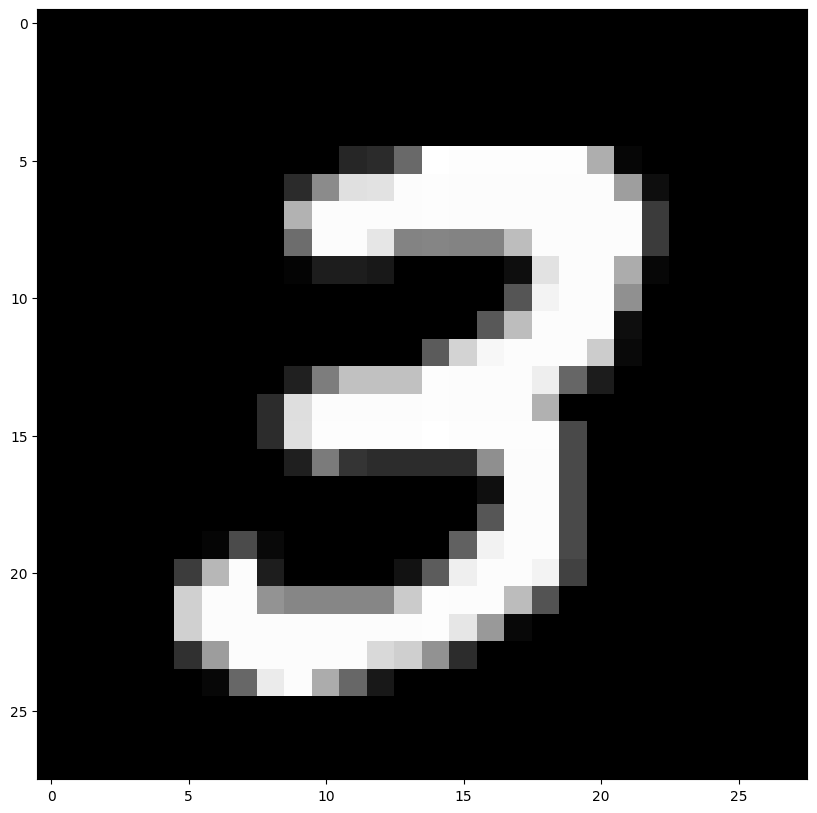

In [5]:
num_labels = len(np.unique(y_train))

#Veri setinden örnekler gösterilmesi
plt.figure(figsize=(10,10))
plt.imshow(x_train[7],cmap='gray');

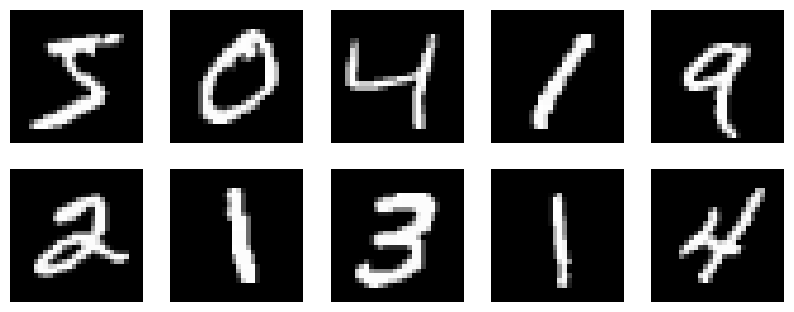

In [6]:
plt.figure(figsize=(10,10)),
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n],cmap='gray')
  plt.axis('off')

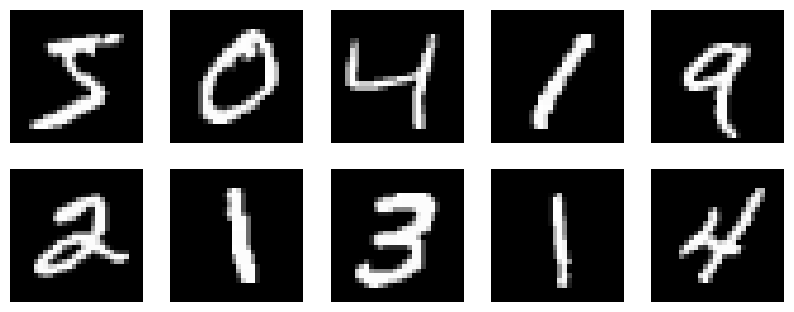

In [7]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(data[n],cmap='gray')
      plt.axis('off')

visualize_img(x_train)

In [8]:
#rgb(0-255)
x_train[2].shape

(28, 28)

In [9]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [10]:
x_train[2][10,10]

0

In [11]:
x_train[2][14,10]

49

In [12]:
x_train[2].sum()

19443

In [13]:
def pixel_visualize(img):
  fig =plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y], 2) ), xy=(y,x),
      color='white' if img[x][y]<threshold else 'black')

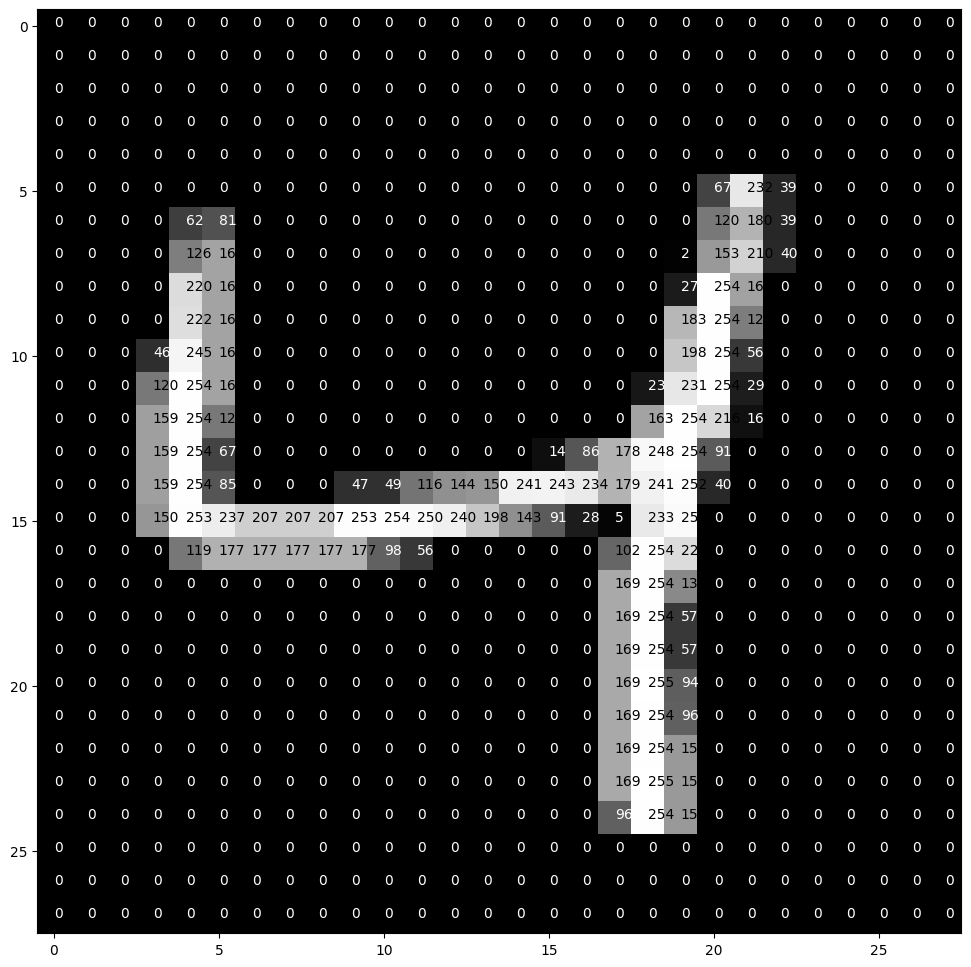

In [14]:
pixel_visualize(x_train[2])

In [15]:
#label encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
#reshaping
image_size = x_train.shape[1]
image_size

28

In [18]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")


x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [19]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}") #1 yeni kanal pizel değerleri

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


In [20]:
#normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [21]:
#Modeling
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation='relu',name='layer1'),
    Dense(units=num_labels,activation='softmax',name='output_layer')])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 7s 10ms/step - loss: 0.3558 - precision: 0.9466 - recall: 0.8487 - accuracy: 0.9029 - val_loss: 0.1878 - val_precision: 0.9587 - val_recall: 0.9328 - val_accuracy: 0.9456
Epoch 2/10
469/469 [==============================] - 4s 10ms/step - loss: 0.1646 - precision: 0.9635 - recall: 0.9430 - accuracy: 0.9527 - val_loss: 0.1361 - val_precision: 0.9702 - val_recall: 0.9527 - val_accuracy: 0.9617
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1198 - precision: 0.9723 - recall: 0.9590 - accuracy: 0.9652 - val_loss: 0.1133 - val_precision: 0.9721 - val_recall: 0.9610 - val_accuracy: 0.9661
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0927 - precision: 0.9782 - recall: 0.9683 - accuracy: 0.9729 - val_loss: 0.0969 - val_precision: 0.9757 - val_recall: 0.9666 - val_accuracy: 0.9708
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0751 - precision: 0.9823 -

In [23]:
#Evaluation
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0257 - precision: 0.9943 - recall: 0.9918 - accuracy: 0.9929 - val_loss: 0.0685 - val_precision: 0.9811 - val_recall: 0.9772 - val_accuracy: 0.9793
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0214 - precision: 0.9955 - recall: 0.9937 - accuracy: 0.9947 - val_loss: 0.0702 - val_precision: 0.9802 - val_recall: 0.9770 - val_accuracy: 0.9783
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0191 - precision: 0.9962 - recall: 0.9948 - accuracy: 0.9955 - val_loss: 0.0734 - val_precision: 0.9801 - val_recall: 0.9760 - val_accuracy: 0.9782
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0171 - precision: 0.9962 - recall: 0.9950 - accuracy: 0.9956 - val_loss: 0.0709 - val_precision: 0.9799 - val_recall: 0.9770 - val_accuracy: 0.9785
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0135 - precision: 0.9973 - r

Text(0.5, 1.0, 'Eğitim ve Test Kayıp Grafiği')

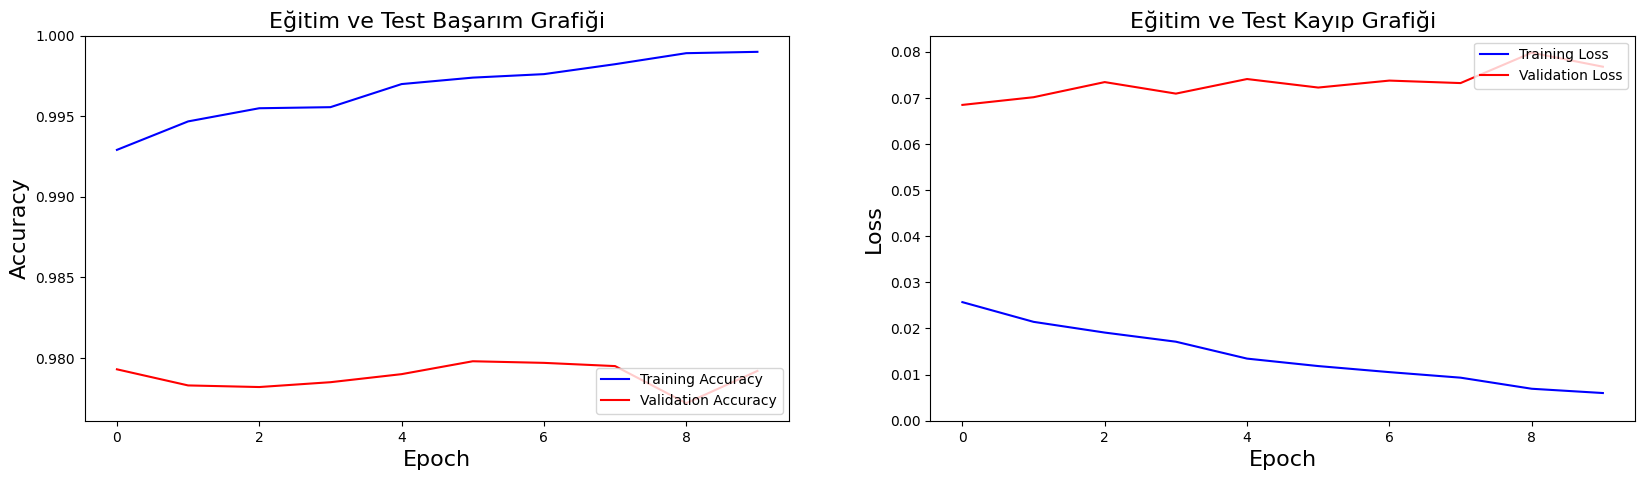

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği',fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],color='b',label='Training Loss')
plt.plot(history.history['val_loss'],color='r',label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği',fontsize=16)

In [25]:
loss, precision, recall ,acc = model.evaluate(x_test, y_test, verbose=False)
print('\nTest Accuracy: %.1f%%' % (100.0 * acc))
print('\nTest Loss: %.1f%%' % (100.0 * loss))
print('\nTest Precision: %.1f%%' % (100.0 * precision))
print('\nTest Recall: %.1f%%' % (100.0 * recall))



Test Accuracy: 97.9%

Test Loss: 7.7%

Test Precision: 98.1%

Test Recall: 97.8%


In [26]:
 model.save('mnist_model.h5')

In [27]:
import random
random = random.randint(0,x_test.shape[0])

In [28]:
random

5474

In [29]:
test_image = x_test[random]

In [30]:
y_test[random]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

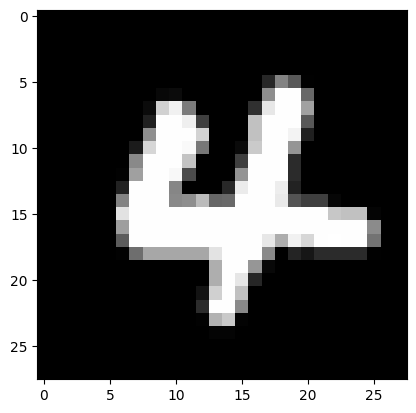

In [31]:
plt.imshow(test_image.reshape(28,28),cmap='gray');

In [32]:
test_data = x_test[random].reshape(1,28,28,1)

In [33]:
probability = model.predict(test_data)

probability

1/1 [==============================] - 0s 80ms/step


array([[2.2638277e-18, 5.6421274e-18, 2.2988113e-14, 3.3573931e-18,
        1.0000000e+00, 6.4936557e-17, 6.7938548e-13, 9.1915113e-12,
        1.0843488e-20, 8.9958001e-16]], dtype=float32)

In [34]:
predicted_classes = np.argmax(probability)
predicted_classes

4

In [35]:
print(f"Tahmin Edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=-1))[0]}\n ")
print(f"Diğer Sınıfların Olasılık Değerleri:\n {probability}")


Tahmin Edilen Sınıf: 4 

Tahmin Edilen Sınıfın Olasılık Değeri: 1.0
 
Diğer Sınıfların Olasılık Değerleri:
 [[2.2638277e-18 5.6421274e-18 2.2988113e-14 3.3573931e-18 1.0000000e+00
  6.4936557e-17 6.7938548e-13 9.1915113e-12 1.0843488e-20 8.9958001e-16]]
